# 時代革命: A Data Science Investigation About Past Protests Around the World

<img src="https://static01.nyt.com/images/2019/12/15/slideshows/15YIP-October-slide-KNHS/15YIP-October-slide-KNHS-superJumbo.jpg">

[New York Times Photo by Lam Yik Fei ](https://www.nytimes.com/interactive/2019/world/year-in-pictures.html)

## Overarching Question: How does violence impact mass mobilization?

**Why this question?** 

There's a revolutionary movement going on in Hong Kong. People here are mobilizing by the millions in the name of democracy. Sometimes the protests are peaceful; sometimes there are violent clashes. There are cases upon cases of police brutality documented by smartphones and news cameras. There are photos of protestors throwing bricks and molotov cocktails.  

As students and teachers living on this island, we've seen protests ebb and flow around us physically and digitally. We've probably all heard a wide range of voices and opinions, especially related to who's to blame about protests. It's important for us to stay engaged and dig to find the truth. 

At the same time, 2019 saw protests the world round: Colombia/Venezuela, Turkey, Lebanon, Chile, Iraq, Kashmir, Sudan, France, Mexico, Uruguay, Ecuador, Haiti, Gaza, Spain, Pakistan, and more. [See a list here.](https://en.wikipedia.org/wiki/Category:2019_protests) 

See photos [here](https://www.theguardian.com/world/2019/oct/25/protests-rage-around-the-world-hong-kong-lebanon-chile-catalonia-iraq). 

In many cases, protests emerge suddenly. 

So my question is **Why now? And why are these protests so explosive?**

Last month (November 2019), I listened to this podcast <a href = "https://www.stitcher.com/podcast/vox/today-explained/e/64953753">"Why is the world protesting?"</a> that covered the protests in Hong Kong, Chile, and Lebanon at the time. In that podcast, they mentioned that researchers at Harvard University have been studying how many protests have occurred, how protests succeed or fail, or how and why some turn violent. 

According to the researchers, it turns out that protests are on the rise around the world, but government violence has actually been decreasing. I wanted to see the trends in the data for myself. 

## About the data sets

In [1]:
#Include any import statements you will need
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
global_df = pd.read_csv('data/mmALL_020619_v15.tab', sep='\t')

**What is this data about?**

<span class="mark">*Data set 1: Global Data on Mass Mobilization*</span>

This dataset documents over 15,500 citizen-led protests around the world in 162 countries between 1990 and March 2017. Here, a protest is defined as a gathering of 50 or more people to make a demand of the **government**. For each protest, the dataset includes features such as protestor demands, the eventual outcomes, the protest size, and more. 

The data set includes information about the protest, the time and location of the protest, the region and country of the protest, the main reasons for protesting, the state response, and more. 

In [3]:
global_df.columns

Index(['id', 'country', 'ccode', 'year', 'region', 'protest', 'protestnumber',
       'startday', 'startmonth', 'startyear', 'endday', 'endmonth', 'endyear',
       'protesterviolence', 'location', 'participants_category',
       'participants', 'protesteridentity', 'protesterdemand1',
       'protesterdemand2', 'protesterdemand3', 'protesterdemand4',
       'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7', 'sources',
       'notes'],
      dtype='object')

**Where is this data from?**

<span class="mark">*Data set 1: Global Data on Mass Mobilization*</span>

After looking up the researchers from the podcast, I found this data set: 
https://dataverse.harvard.edu/dataverse/MMdata
(Clark, David; Regan, Patrick, 2016, "Mass Mobilization Protest Data", https://doi.org/10.7910/DVN/HTTWYL, Harvard Dataverse). https://massmobilization.shinyapps.io/yearlyChangeProtestBehavior/

The main researchers for the Mass Mobilization project are David H. Clark (Binghamton University) and Patrick M. Regan (University of Notre Dame), and the data was made available by a research center at Harvard. The data was compiled from a selected number of English-speaking newspapers. 

**How did this data set get cleaned?**

<span class="mark">*Data set 1: Global Data on Mass Mobilization*</span>

I did not need to do much cleaning of the data myself, but I did exclude all data from the year 2017 because that year's data ends in March and thus is not a full year's worth of data. 

<span class="burk">*Data set 2: Hong Kong Data*</span>

I had to exclude data from certain protest days when the researchers only collected demographic data and no data about opinions. I did this in Google Sheets. 

## Subquestions

**What quantitative subquestions will you investigate?** 

1. Are protests getting more violent around the world? 
2. Do some regions of the world have more violent protests than others? 
3. Is state violence in response to protests on the rise?

# Methods and Results

These are the python libraries I will be using. I'll use pandas to handle my data (as data frames), matplotlib to create visualizations, and numpy plus math to help with some calculations. 

In [5]:
#Import any helper files you need here
 

## First Research Question: Are violent protests on the rise in the world?

### Methods

**How will you approach this question? Which data will you use? What data science tools/functions will you use?**

Your answer here:

To answer this question, I will make scatter plots showing the number of protests per year over time.

Then, I will separate violent and nonviolent protests and make the same charts for just violent protests and just non-violent protests.

### Results 

Text(0, 0.5, 'Number of Protests')

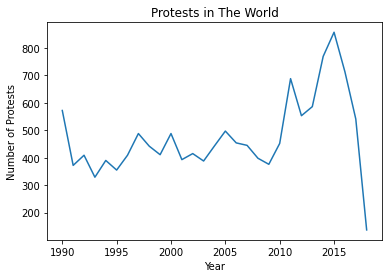

In [6]:
start_df = global_df[["startyear", "protesterviolence"]].dropna()
protest_years = start_df["startyear"].unique()
protest_years.sort()
protest_counts = []
for year in protest_years:
    year_count = start_df.loc[start_df["startyear"] == year]["startyear"].count()
    protest_counts.append(year_count)

plt.plot(protest_years, protest_counts)
plt.title("Protests in The World")
plt.xlabel('Year')
plt.ylabel('Number of Protests')


In [7]:
start_violent_df = start_df.loc[(start_df["protesterviolence"] == 1)]
violent_protest_years = start_violent_df["startyear"].unique()
violent_protest_years.sort()
violent_protest_counts = []
for year in violent_protest_years:
    year_count = start_violent_df.loc[start_violent_df["startyear"] == year]["startyear"].count()
    violent_protest_counts.append(year_count)
    
start_nonviolent_df = start_df.loc[(start_df["protesterviolence"] == 0)]
nonviolent_protest_years = start_nonviolent_df["startyear"].unique()
nonviolent_protest_years.sort()
nonviolent_protest_counts = []
for year in nonviolent_protest_years:
    year_count = start_nonviolent_df.loc[start_nonviolent_df["startyear"] == year]["startyear"].count()
    nonviolent_protest_counts.append(year_count)

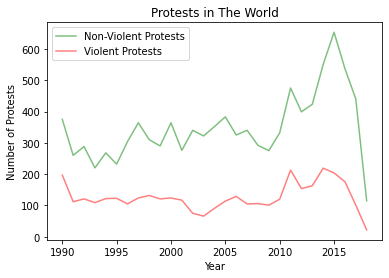

In [8]:
ax = plt.plot(nonviolent_protest_years, nonviolent_protest_counts,c='green',alpha=0.5, label="Non-Violent Protests")
ax = plt.plot(violent_protest_years, violent_protest_counts,c='red',alpha=0.5, label="Violent Protests")

plt.title("Protests in The World")
plt.xlabel('Year')
plt.ylabel('Number of Protests')
plt.legend()

This graph shows that protests have been on the rise in general, especially since 2010.

## Second Research Question: Do some regions of the world have more violent protests than others?

### Methods

To answer this question, I will divide all of the protests by their region and make a pi chart showing the percentage of the overall protests each region has.

### Results

In [9]:
regions_df = global_df[["startyear", "protesterviolence", "region"]].dropna()
south_am_counts = regions_df.loc[regions_df["region"] == 1]["region"].count()
central_am_counts = regions_df.loc[regions_df["region"] == 2]["region"].count()
north_am_counts = regions_df.loc[regions_df["region"] == 3]["region"].count()
europe_counts = regions_df.loc[regions_df["region"] == 4]["region"].count()
asia_counts = regions_df.loc[regions_df["region"] == 5]["region"].count()
mena_counts = regions_df.loc[regions_df["region"] == 6]["region"].count()
africa_counts = regions_df.loc[regions_df["region"] == 7]["region"].count()

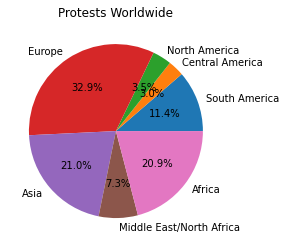

In [10]:
region_names = ["South America","Central America","North America","Europe", "Asia", "Middle East/North Africa", "Africa"]
region_protests = [south_am_counts, central_am_counts, north_am_counts, europe_counts, asia_counts, mena_counts, africa_counts]

plt.pie(region_protests,            # sets data
        labels = region_names,   # sets labels
        autopct='%1.1f%%')          # displays values
plt.title("Protests Worldwide")
plt.show()

In [11]:
violent_regions_df = regions_df.loc[regions_df["protesterviolence"] == 1]
violent_south_am_counts = violent_regions_df.loc[violent_regions_df["region"] == 1]["region"].count()
violent_central_am_counts = violent_regions_df.loc[violent_regions_df["region"] == 2]["region"].count()
violent_north_am_counts = violent_regions_df.loc[violent_regions_df["region"] == 3]["region"].count()
violent_europe_counts = violent_regions_df.loc[violent_regions_df["region"] == 4]["region"].count()
violent_asia_counts = violent_regions_df.loc[violent_regions_df["region"] == 5]["region"].count()
violent_mena_counts = violent_regions_df.loc[violent_regions_df["region"] == 6]["region"].count()
violent_africa_counts = violent_regions_df.loc[violent_regions_df["region"] == 7]["region"].count()


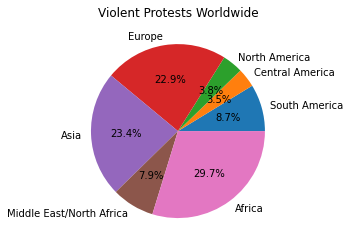

In [12]:
region_names = ["South America","Central America","North America","Europe", "Asia", "Middle East/North Africa", "Africa"]
violent_region_protests = [violent_south_am_counts, violent_central_am_counts, violent_north_am_counts, violent_europe_counts, violent_asia_counts, violent_mena_counts, violent_africa_counts]

plt.pie(violent_region_protests,            # sets data
        labels = region_names,   # sets labels
        autopct='%1.1f%%')          # displays values
plt.title("Violent Protests Worldwide")
plt.show()

In [13]:
nonviolent_regions_df = regions_df.loc[regions_df["protesterviolence"] == 0]
nonviolent_south_am_counts = nonviolent_regions_df.loc[nonviolent_regions_df["region"] == 1]["region"].count()
nonviolent_central_am_counts = nonviolent_regions_df.loc[nonviolent_regions_df["region"] == 2]["region"].count()
nonviolent_north_am_counts = nonviolent_regions_df.loc[nonviolent_regions_df["region"] == 3]["region"].count()
nonviolent_europe_counts = nonviolent_regions_df.loc[nonviolent_regions_df["region"] == 4]["region"].count()
nonviolent_asia_counts = nonviolent_regions_df.loc[nonviolent_regions_df["region"] == 5]["region"].count()
nonviolent_mena_counts = nonviolent_regions_df.loc[nonviolent_regions_df["region"] == 6]["region"].count()
nonviolent_africa_counts = nonviolent_regions_df.loc[nonviolent_regions_df["region"] == 7]["region"].count()


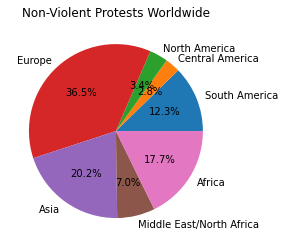

In [14]:
region_names = ["South America","Central America","North America","Europe", "Asia", "Middle East/North Africa", "Africa"]
nonviolent_region_protests = [nonviolent_south_am_counts, nonviolent_central_am_counts, nonviolent_north_am_counts, nonviolent_europe_counts, nonviolent_asia_counts, nonviolent_mena_counts, nonviolent_africa_counts]

plt.pie(nonviolent_region_protests,            # sets data
        labels = region_names,   # sets labels
        autopct='%1.1f%%')  # displays values
plt.title("Non-Violent Protests Worldwide")
plt.show()

After looking at these pie charts, I found them hard to analyze and still wasn't satisfied with my ability to answer my question. So, I then tried visualizing the data in a stack bar chart so I could more easily compare the number of protests of each kind across regions and within regions.

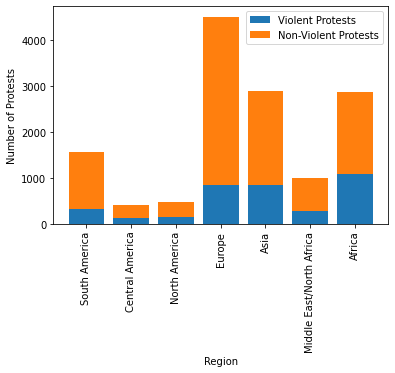

In [15]:
plt.bar(region_names, violent_region_protests, label='Violent Protests')
plt.bar(region_names, nonviolent_region_protests, bottom=violent_region_protests, label='Non-Violent Protests')

plt.ylabel("Number of Protests")
plt.xlabel("Region")
plt.xticks(rotation=90)
plt.legend()

With this chart, I get even more insight into the situation. While the African region has more violent protests than other regions, it only has slightly more than the European and Asian region. Overall, violent protests make up a smaller percentage of all protests than non-violent ones.

To answer my question then, it seems that the European, Asian, and African regions have the most violent protests while the African region has the highest percentage of violent protests compared to the overall number of protests.

## Third Research Question: Is state violence on the rise?

In [16]:
start_state_df = global_df[["startyear", 'stateresponse1', 'stateresponse2', 'stateresponse3', 'stateresponse4',
       'stateresponse5', 'stateresponse6', 'stateresponse7']]

set(list(start_state_df['stateresponse1']) + list(start_state_df['stateresponse2']) + list(start_state_df['stateresponse3']) + list(start_state_df['stateresponse4']) + list(start_state_df['stateresponse5']) + list(start_state_df['stateresponse6']) + list(start_state_df['stateresponse7']))


{'.',
 'accomodation',
 'arrests',
 'beatings',
 'crowd dispersal',
 'ignore',
 'killings',
 nan,
 'shootings'}

Here I have to make a decision about which state responses count as violent. Some of the responses like beatings, shootings, and killings are obviously violent and some like accommodation and ignore are obviously nonviolent. However, arrests and crowd dispersal seem a less clear.

I will perform the same analysis twice, once including these two in violent responses and once including them in non-violent responses.

### Strict Violence Interpretion (excluding arrests and crowd dispersal)

In [17]:
violent_state_responses = ['beatings', 'killings', 'shootings']

start_state_violence_df = start_state_df[start_state_df.stateresponse1.isin(violent_state_responses) | start_state_df.stateresponse2.isin(violent_state_responses) | start_state_df.stateresponse3.isin(violent_state_responses) | start_state_df.stateresponse4.isin(violent_state_responses) | start_state_df.stateresponse5.isin(violent_state_responses) | start_state_df.stateresponse6.isin(violent_state_responses) | start_state_df.stateresponse7.isin(violent_state_responses)]
start_state_nonviolent_df = start_state_df[~start_state_df.stateresponse1.isin(violent_state_responses) & ~start_state_df.stateresponse2.isin(violent_state_responses) & ~start_state_df.stateresponse3.isin(violent_state_responses) & ~start_state_df.stateresponse4.isin(violent_state_responses) & ~start_state_df.stateresponse5.isin(violent_state_responses) & ~start_state_df.stateresponse6.isin(violent_state_responses) & ~start_state_df.stateresponse7.isin(violent_state_responses)]


In [18]:
violent_state_years = start_state_violence_df["startyear"].dropna().unique()
violent_state_years.sort()
violent_state_counts = []
for year in list(violent_state_years):
    year_count = start_state_violence_df.loc[start_state_violence_df["startyear"] == year]["startyear"].count()
    violent_state_counts.append(year_count)
    
nonviolent_state_years = start_state_nonviolent_df["startyear"].dropna().unique()
nonviolent_state_years.sort()
nonviolent_state_counts = []
for year in nonviolent_state_years:
    year_count = start_state_nonviolent_df.loc[start_state_nonviolent_df["startyear"] == year]["startyear"].count()
    nonviolent_state_counts.append(year_count)

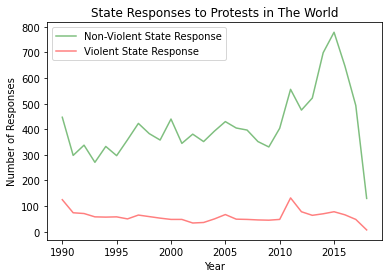

In [19]:
ax = plt.plot(nonviolent_state_years, nonviolent_state_counts,c='green',alpha=0.5, label="Non-Violent State Response")
ax = plt.plot(violent_state_years, violent_state_counts,c='red',alpha=0.5, label="Violent State Response")

plt.title("State Responses to Protests in The World")
plt.xlabel('Year')
plt.ylabel('Number of Responses')
plt.legend()

### Inclusive Violence Interpretation (Including arrests and crowd dispersal)

In [20]:
violent_state_responses = ['beatings', 'killings', 'shootings', 'arrests', 'crowd dispersal']

start_state_violence_df = start_state_df[start_state_df.stateresponse1.isin(violent_state_responses) | start_state_df.stateresponse2.isin(violent_state_responses) | start_state_df.stateresponse3.isin(violent_state_responses) | start_state_df.stateresponse4.isin(violent_state_responses) | start_state_df.stateresponse5.isin(violent_state_responses) | start_state_df.stateresponse6.isin(violent_state_responses) | start_state_df.stateresponse7.isin(violent_state_responses)]
start_state_nonviolent_df = start_state_df[~start_state_df.stateresponse1.isin(violent_state_responses) & ~start_state_df.stateresponse2.isin(violent_state_responses) & ~start_state_df.stateresponse3.isin(violent_state_responses) & ~start_state_df.stateresponse4.isin(violent_state_responses) & ~start_state_df.stateresponse5.isin(violent_state_responses) & ~start_state_df.stateresponse6.isin(violent_state_responses) & ~start_state_df.stateresponse7.isin(violent_state_responses)]


In [21]:
violent_state_years = start_state_violence_df["startyear"].dropna().unique()
violent_state_years.sort()
violent_state_counts = []
for year in list(violent_state_years):
    year_count = start_state_violence_df.loc[start_state_violence_df["startyear"] == year]["startyear"].count()
    violent_state_counts.append(year_count)
    
nonviolent_state_years = start_state_nonviolent_df["startyear"].dropna().unique()
nonviolent_state_years.sort()
nonviolent_state_counts = []
for year in nonviolent_state_years:
    year_count = start_state_nonviolent_df.loc[start_state_nonviolent_df["startyear"] == year]["startyear"].count()
    nonviolent_state_counts.append(year_count)

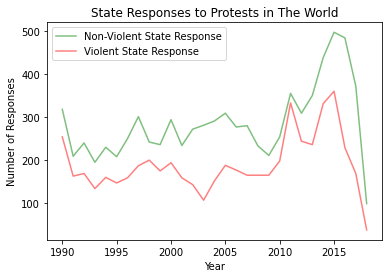

In [22]:
ax = plt.plot(nonviolent_state_years, nonviolent_state_counts,c='green',alpha=0.5, label="Non-Violent State Response")
ax = plt.plot(violent_state_years, violent_state_counts,c='red',alpha=0.5, label="Violent State Response")

plt.title("State Responses to Protests in The World")
plt.xlabel('Year')
plt.ylabel('Number of Responses')
plt.legend()

Comparing these two plots, it seems that state violence is not on the rise if the definition **excludes** arrests and crowd dispersals. However, it appears that state violence is on the rise if you **include** arrests and crowd dispersal.

# Discussion

**In summary, what did you discover?**

Your answer here:

I discovered that while it is true that protests are on the rise, we first have to decide what a violent state response means. If a violent response does not include arrests and crowd dispersals, violent responses are about the same. However, if you include arrests and crowd dispersals, violent responses are increasing with the increasing protests.

Additionally, I discovered that the trends are different in different regions of the world. Specifically, I discovered that the European, Asian, and African regions of the world have the most violent protests.

**What was most surprising? What made sense? How does this confirm or disprove other sources?**

Your answer here:

The researchers on the podcast I listened to were mostly accurate in saying that protests were on the rise but violent state responses were falling. Based on their claim, it seems like the researchers were not including arrests and crowd dispersal in their definition of violence. While I can understand this approach, I believe that it could obscure the fact that states are still doing more to quell protests.

**Why does it matter?**

Your answer here:

Especially as digital and chemical weapons and surveillance technology advances, I think it is important to follow how states respond to protests, including through arrests and crowd dispersal. If states are using increasingly dangerous weapons to disperse crowds or using arrests to begin tracking protesters after a protest, I believe that these responses should be classified as violent. In this case, we should be concerned about the trends shown in this data, perhaps contrary to the perspective of the researchers.

**Describe an algorithmic choice that you made and how your results could have changed if you made that choice differently.**

Your answer here:

One algorithmic choice I made came in filtering the state responses. Here, I chose to filter the data in two different ways to see how it affected the plots I produced. By choosing to explore a couple different ways of filtering the data, I discovered an insight into the data which I believe is important to share.

**Let's go deeper. What qualitative questions do you have that cannot be answered with quantitative analysis?**

Your answer here:

My main qualitative questions are around people's definitions of violence. If I were to continue this research, I would try to interview people about what they think constitutes a violent action and why. Additionally, I would do more research into political and bio ethics to help me understand how other researchers are defining and understanding state violence.